In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


In [28]:
np.random.seed(0)

In [29]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
#print(X)
#print(y)

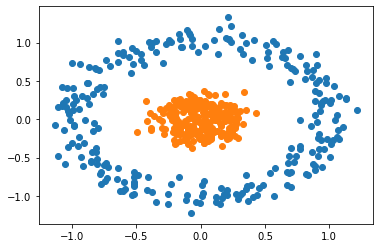

In [30]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [31]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])


In [32]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 366us/step - loss: 0.6982 - accuracy: 0.4000
Epoch 2/100
500/500 [==============================] - 0s 95us/step - loss: 0.6960 - accuracy: 0.5140
Epoch 3/100
500/500 [==============================] - 0s 95us/step - loss: 0.6949 - accuracy: 0.4800
Epoch 4/100
500/500 [==============================] - 0s 95us/step - loss: 0.6942 - accuracy: 0.6640
Epoch 5/100
500/500 [==============================] - 0s 98us/step - loss: 0.6935 - accuracy: 0.5840
Epoch 6/100
500/500 [==============================] - 0s 103us/step - loss: 0.6933 - accuracy: 0.3720
Epoch 7/100
500/500 [==============================] - 0s 91us/step - loss: 0.6927 - accuracy: 0.5780
Epoch 8/100
500/500 [==============================] - 0s 104us/step - loss: 0.6923 - accuracy: 0.5080
Epoch 9/100
500/500 [==============================] - 0s 99us/step - loss: 0.6918 - accuracy: 0.6280
Epoch 10/100
500/500 [==============================] - 0s 99us/step - loss: 0.

In [37]:
#print(h.history)

Text(0.5, 1.0, 'accuracy')

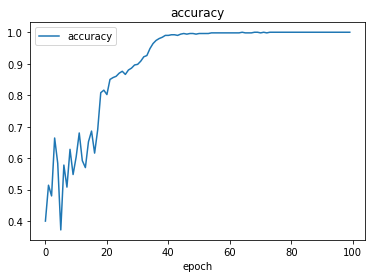

In [36]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

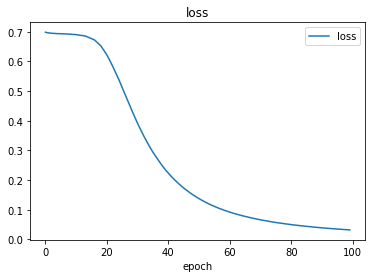

In [38]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [43]:
def plot_boundry(X, y, model):
    x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25, 50)
    y_span = np.linspace(min(X[:, 1])-0.25, max(X[:, 1])+0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    predict_func = model.predict(grid)
    z = predict_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

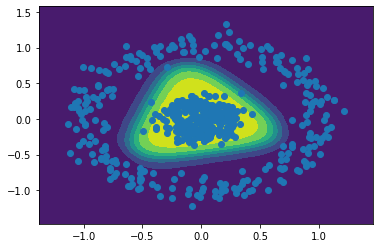

In [44]:
plot_boundry(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

Prediction is:  [[0.9888216]]


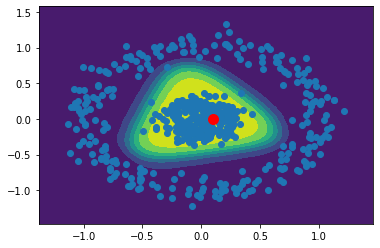

In [47]:
plot_boundry(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('Prediction is: ', prediction)